In [1]:
import pandas as pd

In [31]:
sentence = 5*[0]
sentence[0]="mounting ext2 file system using the ext4 subsystem"
sentence[1]="warning mounting unchecked fs running e2fsck is recommended"
sentence[2]="mounted filesystem without journal Opts null"
sentence[3]="warning mounting unchecked fs running e2fsck is recommended"
sentence[4]="timeout at 0xa2a7021 W timeout core rdc_0"

In [32]:
[print(i)for i in sentence]

mounting ext2 file system using the ext4 subsystem
warning mounting unchecked fs running e2fsck is recommended
mounted filesystem without journal Opts null
warning mounting unchecked fs running e2fsck is recommended
timeout at 0xa2a7021 W timeout core rdc_0


[None, None, None, None, None]

In [33]:
df = pd.DataFrame({'message':sentence})

In [34]:
df

,message
0,mounting ext2 file system using the ext4 subsy...
1,warning mounting unchecked fs running e2fsck i...
2,mounted filesystem without journal Opts null
3,warning mounting unchecked fs running e2fsck i...
4,timeout at 0xa2a7021 W timeout core rdc_0


In [35]:
sent = [row.split(' ') for row in df['message']]

In [36]:
sent[:5]

[['mounting', 'ext2', 'file', 'system', 'using', 'the', 'ext4', 'subsystem'],
 ['warning',
  'mounting',
  'unchecked',
  'fs',
  'running',
  'e2fsck',
  'is',
  'recommended'],
 ['mounted', 'filesystem', 'without', 'journal', 'Opts', 'null'],
 ['warning',
  'mounting',
  'unchecked',
  'fs',
  'running',
  'e2fsck',
  'is',
  'recommended'],
 ['timeout', 'at', '0xa2a7021', 'W', 'timeout', 'core', 'rdc_0']]

In [37]:
from gensim.models import Word2Vec

In [38]:
model = Word2Vec(sent, min_count=1,size= 3,workers=3, window =3,\
                 sg = 1)

In [45]:
model.wv['ext4']

array([-0.12689888, -0.11589331, -0.07932106], dtype=float32)

In [41]:
model.wv.most_similar('ext4')[:3]

[('recommended', 0.9780221581459045),
 ('null', 0.9105072021484375),
 ('e2fsck', 0.8021650314331055)]

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [43]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.wv.similar_by_word(word)
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

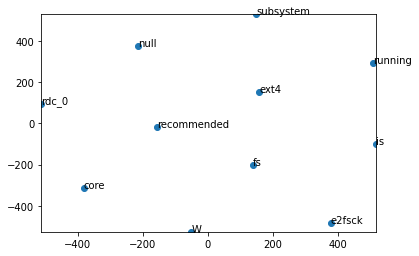

In [44]:
display_closestwords_tsnescatterplot(model, 'ext4', 3) 